In [2]:
import mdtraj

traj = mdtraj.load('../data/chignolin_ensemble.pdb')
top = traj.topology
traj

/Users/ziyuanzhao/miniforge3/envs/jax/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


<mdtraj.Trajectory with 18 frames, 138 atoms, 10 residues, without unitcells at 0x108705780>

In [7]:
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
__package__ = 'mcconv'

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

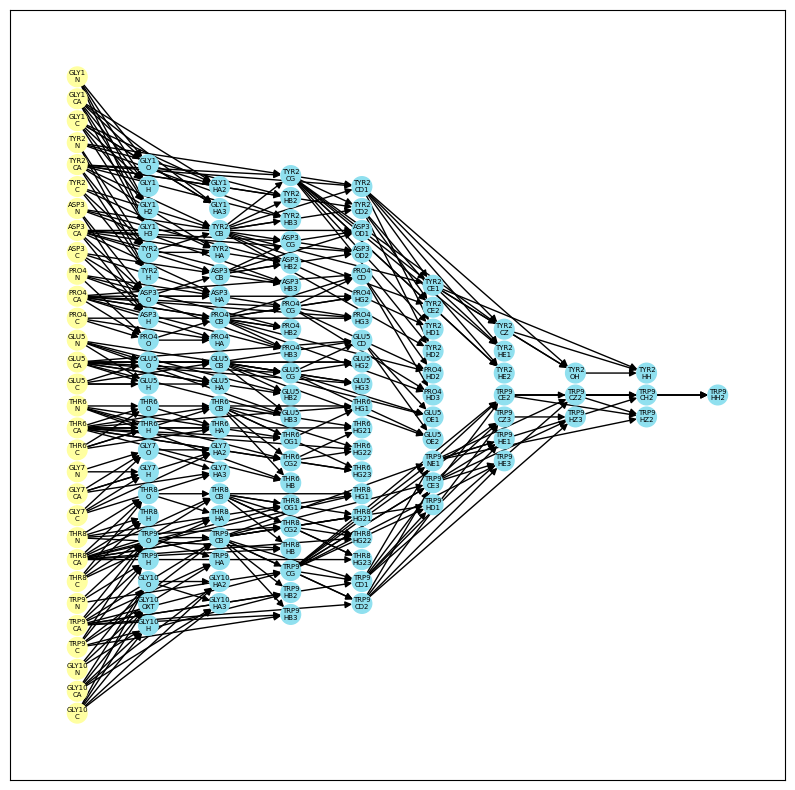

In [9]:
from .converter import residue_gas_converter
from .visualize import visualize_comp_DAG

G = residue_gas_converter(top)

visualize_comp_DAG(G, top)



In [12]:
from .transform import ICTransformation
from .coordsys import build_frame
import jax
import jax.numpy as jnp

build_frame = jax.jit(build_frame)
ict = ICTransformation(top=top, DAG=G, build_frame=build_frame)

In [11]:
ict.flat_Z_indices

DeviceArray([  0,   1,   2,   9,  10,  11,  30,  31,  32,  42,  43,  44,
              56,  57,  58,  71,  72,  73,  85,  86,  87,  92,  93,  94,
             106, 107, 108, 130, 131, 132,   4,   3,   5,   6,  21,  12,
              38,  33,  45,  65,  59,  78,  74,  89,  88,  99,  95, 120,
             109, 135, 133, 134,   7,   8,  22,  13,  39,  34,  49,  46,
              66,  60,  79,  75,  90,  91, 100,  96, 121, 110, 136, 137,
              14,  23,  24,  35,  40,  41,  47,  50,  51,  61,  67,  68,
              76,  77,  80,  97,  98, 101, 122, 123, 111,  15,  16,  36,
              37,  48,  52,  53,  62,  69,  70,  81,  82,  83,  84, 102,
             103, 104, 105, 112, 113,  17,  25,  18,  26,  54,  55,  63,
              64, 124, 114, 116,  19,  27,  28, 125, 115, 126, 118,  20,
             117, 128,  29, 127, 119, 129], dtype=int32)

In [22]:
xyz_0 = jnp.tile(jnp.array(traj.xyz), (1, 1, 1))
print(xyz_0.shape)
frames, ic = ict.xyz2ic(xyz_0)
frames, xyz = ict.ic2xyz(ic)
rmsd = jnp.sqrt(jnp.mean(jnp.sum((xyz-xyz_0)**2, axis=-1)))

print("RMSD between original Cartesian coordinates (xyz0) and these\n \
      inverse-transformed from IC coordinates (ic): ", rmsd)
print("Shape of Cartesian coordinates array: ", xyz_0.shape, "\n"
      "Shape of IC coordinates array: ", ic.shape)

(18, 138, 3)
RMSD between original Cartesian coordinates (xyz0) and these
       inverse-transformed from IC coordinates (ic):  4.540291e-08
Shape of Cartesian coordinates array:  (18, 138, 3) 
shape of IC coordinates array:  (18, 138, 3)
